In [4]:
import numpy as np
import wget

In [50]:
#data = ['house','tree', 'bicycle']
#for item in data:
#    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' +item +'.npy'
#    wget.download(url)

In [5]:
#ipython magic numpy and matplotlib import function
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [6]:
house_images = np.load('house.npy')
tree_images = np.load('tree.npy')
bicycle_images = np.load('bicycle.npy')


In [7]:
tree_house_df = np.zeros((100,64,64))
for i in range(100):
    img_generated = np.zeros((64,64))
    
    if random.random() < 0.5:
        img_generated[17:45,0:28] = house_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = tree_images[i,:].reshape((28, 28))
    else:
        img_generated[17:45,0:28] = tree_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = house_images[i,:].reshape((28, 28))
    tree_house_df[i] = img_generated

In [8]:
tree_house_df.shape

(100, 64, 64)

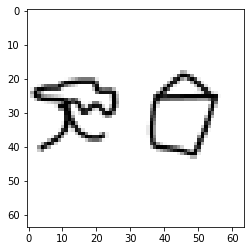

In [14]:
imshow(tree_house_df[59], cmap = 'binary')

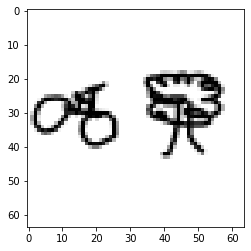

In [13]:
imshow(tree_bicycle_df[52], cmap = 'binary')

In [11]:
tree_bicycle_df = np.zeros((100,64,64))
for i in range(100):
    img_generated = np.zeros((64,64))
    
    if random.random() < 0.5:
        img_generated[17:45,0:28] = tree_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = bicycle_images[i,:].reshape((28, 28))
    else:
        img_generated[17:45,0:28] = bicycle_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = tree_images[i,:].reshape((28, 28))
    tree_bicycle_df[i] = img_generated

In [12]:
house_bicycle_df = np.zeros((100,64,64))
for i in range(100):
    img_generated = np.zeros((64,64))
    
    if random.random() < 0.5:
        img_generated[17:45,0:28] = house_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = bicycle_images[i,:].reshape((28, 28))
    else:
        img_generated[17:45,0:28] = bicycle_images[i,:].reshape((28, 28))
        img_generated[17:45,32:60] = house_images[i,:].reshape((28, 28))
    house_bicycle_df[i] = img_generated

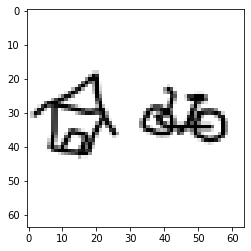

In [15]:
imshow(house_bicycle_df[60], cmap = 'binary')

In [16]:
image_raw = np.vstack((tree_house_df,tree_bicycle_df,house_bicycle_df))

In [17]:
image_labels = np.concatenate((np.repeat(0, 100),np.repeat(1, 100),np.repeat(2, 100)), axis=None)

In [18]:
image_labels.shape

(300,)

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(image_raw, image_labels, test_size=0.2, random_state=42)

In [22]:
print(len(X_train))
print(len(X_test))

240
60


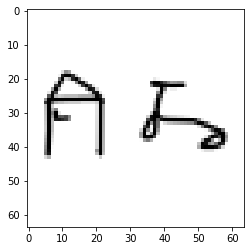

In [23]:
imshow(X_train[0], cmap = 'binary')

In [84]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [87]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
X_train.shape

(240, 64, 64)

In [89]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
240/240 [==============================] - 0s 720us/sample - loss: 24.2733 - acc: 0.3958
Epoch 2/20
240/240 [==============================] - 0s 200us/sample - loss: 14.1723 - acc: 0.5875
Epoch 3/20
240/240 [==============================] - 0s 196us/sample - loss: 7.1210 - acc: 0.7042
Epoch 4/20
240/240 [==============================] - 0s 200us/sample - loss: 6.5779 - acc: 0.7417
Epoch 5/20
240/240 [==============================] - 0s 204us/sample - loss: 4.0972 - acc: 0.7917
Epoch 6/20
240/240 [==============================] - 0s 208us/sample - loss: 4.0056 - acc: 0.8083
Epoch 7/20
240/240 [==============================] - 0s 208us/sample - loss: 2.2741 - acc: 0.8375
Epoch 8/20
240/240 [==============================] - 0s 221us/sample - loss: 2.2078 - acc: 0.8708
Epoch 9/20
240/240 [==============================] - 0s 217us/sample - loss: 1.7540 - acc: 0.8792
Epoch 10/20
240/240 [==============================] - 0s 237us/sample - loss: 1.2329 - acc: 0.9250
Epoch 1

In [92]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

60/60 [==============================] - 0s 116us/sample - loss: 1.6409 - acc: 0.8833

Test accuracy: 0.8833333


In [93]:
class_names = ['tree_house','tree_bicycle','house_bicycle']

In [94]:
predictions = model.predict(X_test)

In [95]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label,class_num):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(class_num))
  plt.yticks([])
  thisplot = plt.bar(range(class_num), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

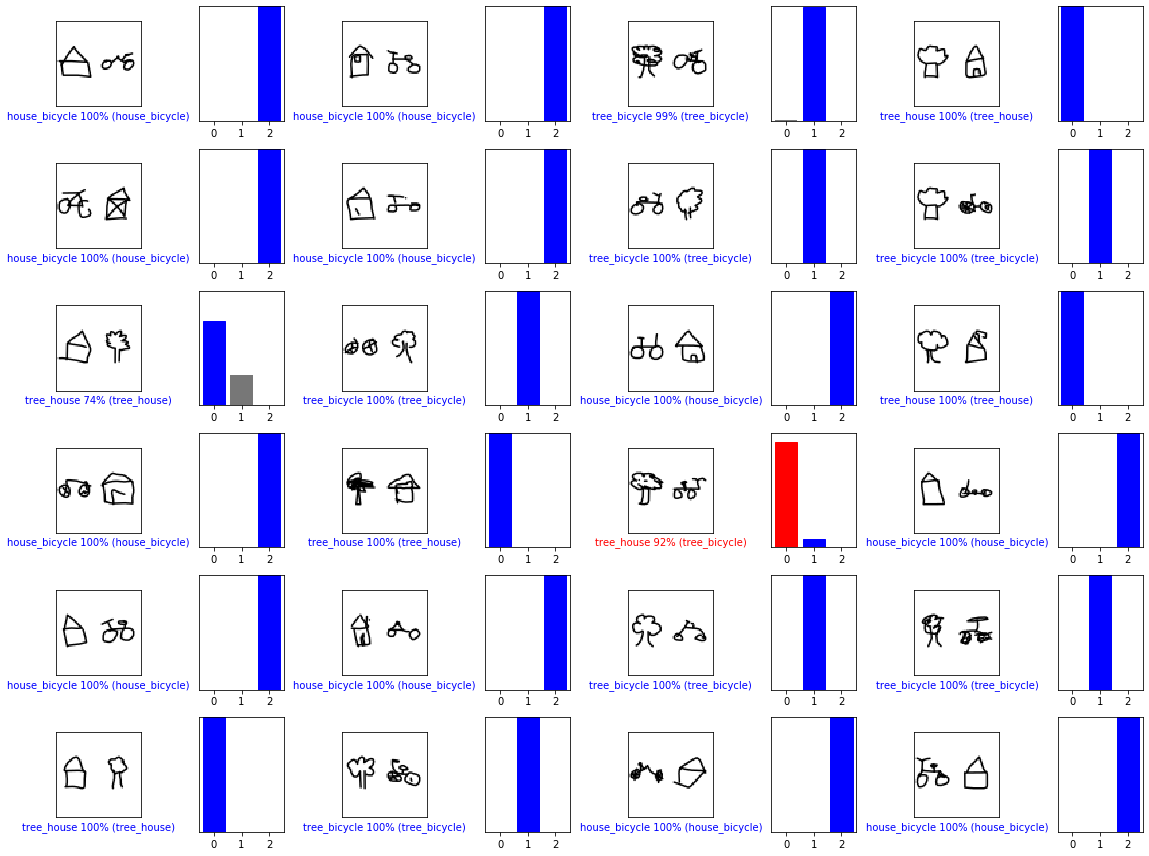

In [96]:
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test,3)
plt.tight_layout()
plt.show()

In [97]:
tree_house_df[0].shape

(64, 64)

In [98]:
similar_pair_df = np.zeros((9000,64,128))
for i in range(9000):
    img_generated = np.zeros((64,128))
    
    if i < 3000:
        img_generated[:,0:64] = tree_house_df[random.randint(1, 99)]
        img_generated[:,64:128] = tree_house_df[random.randint(1, 99)]
    elif i < 6000:
        img_generated[:,0:64] = tree_bicycle_df[random.randint(1, 99)]
        img_generated[:,64:128] = tree_bicycle_df[random.randint(1, 99)]
    else:
        img_generated[:,0:64] = house_bicycle_df[random.randint(1, 99)]
        img_generated[:,64:128] = house_bicycle_df[random.randint(1, 99)]
    similar_pair_df[i] = img_generated

In [99]:
different_pair_df = np.zeros((9000,64,128))
for i in range(9000):
    img_generated = np.zeros((64,128))
    
    if i < 3000:
        if random.random() < 0.5:
            img_generated[:,0:64] = tree_house_df[random.randint(1, 99)]
            img_generated[:,64:128] = tree_bicycle_df[random.randint(1, 99)]
        else:
            img_generated[:,0:64] = tree_bicycle_df[random.randint(1, 99)] 
            img_generated[:,64:128] = tree_house_df[random.randint(1, 99)]
        
    elif i < 3000:
        if random.random() < 0.5:
            img_generated[:,0:64] = tree_bicycle_df[random.randint(1, 99)]
            img_generated[:,64:128] = house_bicycle_df[random.randint(1, 99)]
        else:
            img_generated[:,0:64] =  house_bicycle_df[random.randint(1, 99)]
            img_generated[:,64:128] = tree_bicycle_df[random.randint(1, 99)]
       
    else:
        if random.random() < 0.5:
            img_generated[:,0:64] = house_bicycle_df[random.randint(1, 99)]
            img_generated[:,64:128] = tree_house_df[random.randint(1, 99)]
        else:
            img_generated[:,0:64] = tree_house_df[random.randint(1, 99)] 
            img_generated[:,64:128] = house_bicycle_df[random.randint(1, 99)]
    different_pair_df[i] = img_generated

In [100]:
pair_images_raw = np.vstack((similar_pair_df, different_pair_df))

In [101]:
pair_images_raw.shape

(18000, 64, 128)

In [102]:
pair_images_labels = np.concatenate((np.repeat(1, 9000),np.repeat(0, 9000)), axis=None)

In [103]:
pair_images_labels.shape

(18000,)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(pair_images_raw, pair_images_labels, test_size=0.2, random_state=42)

In [106]:
print(len(X_train))
print(len(y_test))

14400
3600


In [126]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1, noise_shape=None, seed=None),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1, noise_shape=None, seed=None),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 2)                

In [129]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [128]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
14400/14400 [==============================] - 5s 351us/sample - loss: 2.6285 - acc: 0.5580
Epoch 2/20
14400/14400 [==============================] - 5s 316us/sample - loss: 0.2538 - acc: 0.8921
Epoch 3/20
14400/14400 [==============================] - 5s 322us/sample - loss: 0.0771 - acc: 0.9723
Epoch 4/20
14400/14400 [==============================] - 5s 326us/sample - loss: 0.0497 - acc: 0.9826
Epoch 5/20
14400/14400 [==============================] - 5s 344us/sample - loss: 0.0394 - acc: 0.9868
Epoch 6/20
14400/14400 [==============================] - 5s 329us/sample - loss: 0.0371 - acc: 0.9872
Epoch 7/20
14400/14400 [==============================] - 5s 326us/sample - loss: 0.0365 - acc: 0.9893
Epoch 8/20
14400/14400 [==============================] - 5s 323us/sample - loss: 0.0273 - acc: 0.9924
Epoch 9/20
14400/14400 [==============================] - 5s 325us/sample - loss: 0.0253 - acc: 0.9928
Epoch 10/20
14400/14400 [==============================] - 5s 327us/sampl

In [130]:
class_names = ['different','similar']

In [131]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

3600/3600 [==============================] - 1s 178us/sample - loss: 0.0126 - acc: 0.9944

Test accuracy: 0.99444443


In [132]:
predictions = model.predict(X_test)

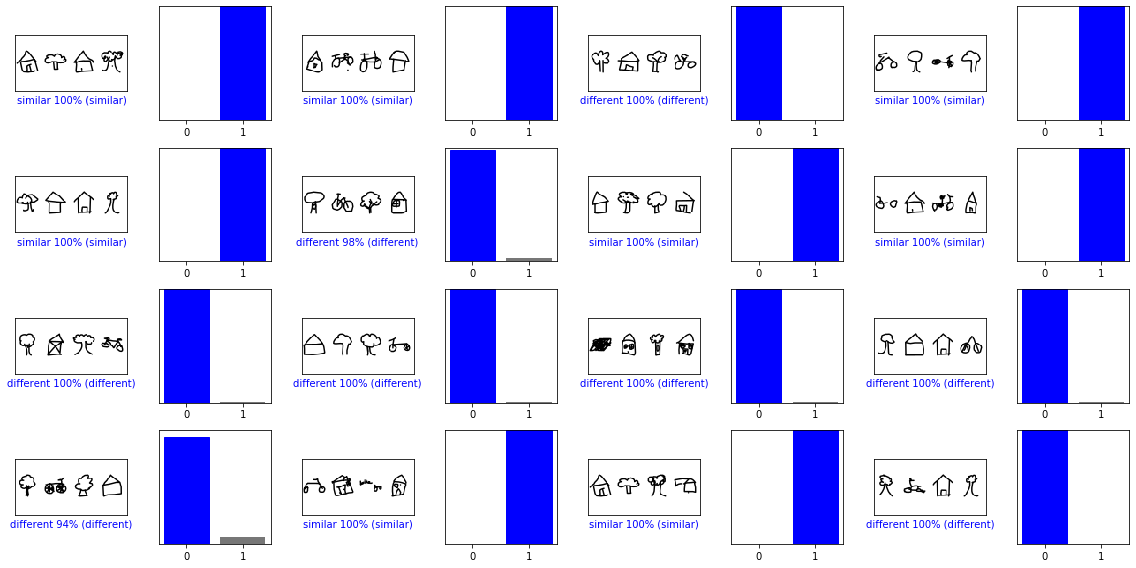

In [133]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test,2)
plt.tight_layout()
plt.show()

In [2]:
from keras.layers import Dense, Input
from keras.models import Model

Using TensorFlow backend.


In [3]:
input_size = 4096
hidden_size = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
autoencoder.fit(X_train, X_train, epochs=20)

ValueError: Error when checking input: expected input_1 to have 2 dimensions, but got array with shape (240, 64, 64)